In [21]:
print('Das Ziel ist:\n\
die Fahrerprofil anhand von der Nutzungsform klassifizieren\
spricht: wird das Auto in der Stadt, Landstraße oder Autobahn bewegt...\n\
Daraus kann man ableiten wie das Auto im Schnitt bewegt wird')

Das Ziel ist:
die Fahrerprofil anhand von der Nutzungsform klassifizierenspricht: wird das Auto in der Stadt, Landstraße oder Autobahn bewegt...
Daraus kann man ableiten wie das Auto im Schnitt bewegt wird


In [1]:
#Daten extraktion
import pandas as pd
import numpy as np 
import seaborn as sns

In [5]:
#Daten extraktion
#C:\Users\Lenovo\Documents\docs\master_arbeit\arbeit\masterarbeit_code\data
df = pd.read_csv("C:/Users/Lenovo/Documents/docs/master_arbeit/arbeit/masterarbeit_code/data/export.csv", sep=";")#,
                 #converters={'KBI_angez_Geschw[Unit_KiloMeterPerHour]':umwandeln_float}
                # ) #dtype ={'fahren': str} -so dtype angeben

# df["KBI_angez_Geschw[Unit_KiloMeterPerHour]"]=\
#                   df["KBI_angez_Geschw[Unit_KiloMeterPerHour]"].str.replace(',','.')\
#                       .astype(float)
# df["BR5_Bremsdruck[Unit_Bar]"]=\
#                   df["BR5_Bremsdruck[Unit_Bar]"].str.replace(',','.')\
#                       .astype(float)
df.head()

C:\Users\Lenovo\miniconda3\envs\masterarbeit\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,time,BR5_Bremsdruck[Unit_Bar],ESP_Fahrer_bremst[],ACC_Minimale_Bremsung_valid[1],BSL_ZAS_Kl_15_valid[1],MO1_Drehzahl_valid[1],MO_Gangposition[],LWI_Lenkradwinkel[Unit_DegreOfArc],D_LWI_Lenkradw_Geschw[Unit_DegreOfArcPerSecon],KBI_Kilometerstand_valid[1],...,ACC_Minimale_Bremsung[],BR5_Bremsdruck_valid[1],ESP_Fahrer_bremst_valid[1],GPS fix[1],KBI_angez_Geschw[Unit_KiloMeterPerHour],LWI_Lenkradwinkel_valid[1],D_LWI_Lenkradw_Geschw_valid[1],MO1_Drehzahl[Unit_MinutInver],KBI_Handbremse[],KBI_Kilometerstand[Unit_KiloMeter]
0,"0,016206","-0,6000000000000014",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"0,022461",NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"0,022645",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,"0,03075",NaN,NaN,NaN,NaN,NaN,NaN,"5,9",0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"0,03186",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Daten extraktion
df = df.astype(float)
df

ValueError: could not convert string to float: '0,016206'

In [5]:
#Daten extraktion
def ersetzen(s):
    i=str(s).find(',')
    if(i>0):
        return s[:i] + '.' + s[i+1:]
    else :
        return s 
for col in df.columns:
    #df[col]=umwandeln_float(col) #check
    #df[col]= df[col].str.replace(',','.').astype(float)
    df[col]=  df[col].apply(ersetzen)
    df[col] = pd.to_numeric(df[col],errors = 'coerce')

In [25]:
#Daten aufbereiten
df["KBI_angez_Geschw[Unit_KiloMeterPerHour]"].describe()


count    81243.000000
mean       101.950445
std         40.743183
min          0.000000
25%         80.960000
50%        115.520000
75%        131.520000
max        168.000000
Name: KBI_angez_Geschw[Unit_KiloMeterPerHour], dtype: float64

In [27]:
#Daten aufbereiten
letzte_zeit_eintrag=df['time'].iloc[-1]
print(letzte_zeit_eintrag)
erster_eintrag=df['time'].iloc[0]
print(erster_eintrag)
print(letzte_zeit_eintrag/erster_eintrag)

16539.468
0.016206
1020576.8233987412


In [6]:
#Datenaufbereiten

##--hier Auswahl, weil man den Use case analysiert hat und diese jetzt hiere auswählt--##
colum_filter=['BR5_Bremsdruck[Unit_Bar]', 'ESP_Fahrer_bremst[]', 'LWI_Lenkradwinkel[Unit_DegreOfArc]', 'D_LWI_Lenkradw_Geschw[Unit_DegreOfArcPerSecon]', 'MO_StartStopp_StoppVorbereitung[]', 'BSL_ZAS_Kl_15[]', 'V_UTCTime_continous[1]', 'GPS fix[1]', 'KBI_angez_Geschw[Unit_KiloMeterPerHour]', 'MO1_Drehzahl[Unit_MinutInver]', 'KBI_Kilometerstand[Unit_KiloMeter]']

dt_filtered = df[colum_filter]
dt_filtered

,BR5_Bremsdruck[Unit_Bar],ESP_Fahrer_bremst[],LWI_Lenkradwinkel[Unit_DegreOfArc],D_LWI_Lenkradw_Geschw[Unit_DegreOfArcPerSecon],MO_StartStopp_StoppVorbereitung[],BSL_ZAS_Kl_15[],V_UTCTime_continous[1],GPS fix[1],KBI_angez_Geschw[Unit_KiloMeterPerHour],MO1_Drehzahl[Unit_MinutInver],KBI_Kilometerstand[Unit_KiloMeter]
0,-0.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,NaN,5.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5142493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5142494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5142495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5142496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


In [ ]:
#Daten aufbereiten --Implementierung 1
#Datenreihe erzeugen
print('Ansatz 2')
dic =  [ [1,np.nan], [2,2], [3,np.nan],[6,7],[np.nan,2] ]
#data = df_ana.copy()
#data = df_ana.copy() #  pd.DataFrame(dic, columns= ['A','B'])
data= dt_filtered.copy()
def findmin(alist):
    '''
    find max in case of nan in list
    '''
    findmin_=[]
    for val in alist:
        if not np.isnan(val):
            findmin_.append(val)
    min_ist=min(findmin_) 
    return min_ist

def check_firstvalids_are_nan(some_list):
    '''
    ueberpruefe, ob alle Werte in erste valid index nan ist
    wenn ja soll man abbrechen, denn es kann angenommen werden, dass man den Datensatz 
    vollstaendig bearbeitet hat 
    '''
    gib_es_valid=0
    for val in some_list:
        #print('!',some_list, val , 'len:', len(some_list))
        if np.isnan(val) or val is None:
            val= 0
        gib_es_valid = gib_es_valid+ int(val)
    return gib_es_valid>0 #True-> nicht nur nans

dt=[] #data for Ansatz_2
max_non_nan_wert = 0  #max_val = 0 , 0
for i in range(data.shape[0]): 
    dt_row=[] #row for data

    first_val = data.apply(pd.Series.first_valid_index) #find not_nans
    not_nans  = [not_nan for not_nan in first_val]

    if not any(x is None for x in not_nans):
        if check_firstvalids_are_nan(not_nans) :
            #print(not_nans) 
        # if len(not_nans)>0: #check that it is not none 
            max_wert = findmin(not_nans)
            #print('max:', max_wert , )
            if not np.isnan(max_wert) :   
                max_val = int(max_wert)
                #if max_val+1<= data.shape[0]:
                   #print(max_val , not_nans)#if  max_val+1<= data.shape[0]: 
                max_val = max_val+1 #we want to iterate as from here
                
            else: #df wurde vollständig durchlaufen
                #df_ansatz=pd.DataFrame(dt, columns=data.columns)
                break #return df_ansatz: wenn in fktn
    else:
        break

    for indx, col in enumerate(data.columns):
       df_for_mean = pd.DataFrame() #create a new empty df
       #print('-',int(max_non_nan_wert),':', int(max_val))

       df_for_mean[col] = data.iloc[int(max_non_nan_wert): int(max_val), int(indx)].dropna().copy()
       if df_for_mean.shape[0]==0:
           #print('why',df_for_mean)
           if len(dt)>0 : #falls Datensatz nicht vollstaendig leer ist
              Liste_vorher= dt[-1] #letzes Element
              mean_vorher = Liste_vorher[indx] #nehme das Element
              mean_for_col =mean_vorher 
              dt_row.append(mean_for_col)
           else: 
               mean_for_col = 0
               dt_row.append(mean_for_col)
       else: #also es ist alles leer
           average = df_for_mean[col].mean()
           #nehme das Element
           mean_for_col =average #if average!=np.nan else mean_vorher 
           dt_row.append(mean_for_col)
      
      # dt_row.append(mean_for_col)
       for i in range(max_non_nan_wert, max_val):
          if not np.isnan(not_nans[indx]): #set  #value to nan, so as to find  1st next not nan
             data.iloc[i,int(indx)]= np.nan
    dt.append(dt_row) #add data line to data
    max_non_nan_wert = max_val
    #print('?',max_non_nan_wert ,max_val, 'mean:',mean_for_col)  
   
# data_ansatz2_2 = pd.DataFrame(dt, columns= ['KBI_angez_Geschw[Unit_KiloMeterPerHour]',\
#          'BSL_ZAS_Kl_15[]', 'KBI_Kilometerstand[Unit_KiloMeter]',\
#                                                    'MO1_Drehzahl_valid[1]'])

data_ansatz2_2 = pd.DataFrame(dt, columns= ['KBI_angez_Geschw[Unit_KiloMeterPerHour]',\
         'BSL_ZAS_Kl_15[]', 'KBI_Kilometerstand[Unit_KiloMeter]',\
                                                   'MO1_Drehzahl_valid[1]'])
#print(first_val)
#print('here',dt)
#print(data_ansatz2.shape[0])
#data_ansatz2_2 = pd.DataFrame(dt, columns= ['A','B'])
data_ansatz2_2

In [ ]:
#Daten aufbereiten --Implementierung 2
#Datenreihen erzeugen
#new_df = pd.DataFrame(columns=lst.columns)
frames = []
def cleanData(frames,lst,n):
    first_vali_index = lst.apply(pd.Series.first_valid_index).min()
    #print(first_vali_index)
    Df = lst.loc[0:first_vali_index]
    Df = Df.groupby(np.arange(len(Df))//(first_vali_index+1)).mean()
    #print(Df)
    if len(frames)>0: 
        for i in range(Df.shape[1]):
            
            if np.isnan(Df.iloc[0, i]):
                  Df.iloc[0, i] =  frames[len(frames)-1].iloc[0,i]        
    else : 
        for i in range(Df.shape[1]):
            if np.isnan(Df.iloc[0, i]):
                   Df.iloc[0,i] = 0           
    frames.append(Df)
    if first_vali_index+1 < n:
        lst = lst.loc[first_vali_index+1:n-1]
        return cleanData(frames,lst,n)
    return pd.concat(frames)

new_df = cleanData(frames,df,df.shape[0])
new_df.reset_index(drop=True, inplace=True)

In [8]:
dt_filtered.corr()

,BR5_Bremsdruck[Unit_Bar],ESP_Fahrer_bremst[],LWI_Lenkradwinkel[Unit_DegreOfArc],D_LWI_Lenkradw_Geschw[Unit_DegreOfArcPerSecon],MO_StartStopp_StoppVorbereitung[],BSL_ZAS_Kl_15[],V_UTCTime_continous[1],GPS fix[1],KBI_angez_Geschw[Unit_KiloMeterPerHour],MO1_Drehzahl[Unit_MinutInver],KBI_Kilometerstand[Unit_KiloMeter]
BR5_Bremsdruck[Unit_Bar],1.000000,0.673746,NaN,NaN,NaN,NaN,0.024788,NaN,NaN,NaN,NaN
ESP_Fahrer_bremst[],0.673746,1.000000,NaN,NaN,NaN,NaN,0.055348,NaN,NaN,NaN,NaN
LWI_Lenkradwinkel[Unit_DegreOfArc],NaN,NaN,1.000000,0.470106,NaN,-0.011881,-0.194472,NaN,NaN,NaN,NaN
D_LWI_Lenkradw_Geschw[Unit_DegreOfArcPerSecon],NaN,NaN,0.470106,1.000000,NaN,0.012273,-0.088537,NaN,NaN,NaN,NaN
MO_StartStopp_StoppVorbereitung[],NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BSL_ZAS_Kl_15[],NaN,NaN,-0.011881,0.012273,NaN,1.000000,0.036523,NaN,NaN,0.157555,NaN
V_UTCTime_continous[1],0.024788,0.055348,-0.194472,-0.088537,NaN,0.036523,1.000000,NaN,NaN,0.178525,NaN
GPS fix[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
KBI_angez_Geschw[Unit_KiloMeterPerHour],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.999920,NaN
MO1_Drehzahl[Unit_MinutInver],NaN,NaN,NaN,NaN,NaN,0.157555,0.178525,NaN,0.99992,1.000000,NaN


In [140]:
#Spärlichkeit und fehlende Werte in dem Datensatz
print('laenge vom Datensatz:', dt_filtered.shape[0])
fehlt=dt_filtered.isnull().sum()
nicht_nan_signal = []
for num in list(fehlt):
    nicht_nan_signal.append(dt_filtered.shape[0]-num)
print(nicht_nan_signal)
print('Nan Werte pro Signal:\n')
fehlt


laenge vom Datensatz: 5142498
[814460, 814460, 1628946, 1628946, 814532, 162921, 162921, 13396, 81243, 1629070, 435]
Nan Werte pro Signal:



BR5_Bremsdruck[Unit_Bar]                          4328038
ESP_Fahrer_bremst[]                               4328038
LWI_Lenkradwinkel[Unit_DegreOfArc]                3513552
D_LWI_Lenkradw_Geschw[Unit_DegreOfArcPerSecon]    3513552
MO_StartStopp_StoppVorbereitung[]                 4327966
BSL_ZAS_Kl_15[]                                   4979577
V_UTCTime_continous[1]                            4979577
GPS fix[1]                                        5129102
KBI_angez_Geschw[Unit_KiloMeterPerHour]           5061255
MO1_Drehzahl[Unit_MinutInver]                     3513428
KBI_Kilometerstand[Unit_KiloMeter]                5142063
dtype: int64

In [9]:
#funktionalisieren
#Man kennt den Use case und trifft Annahmen
#findE IntervalE fuer die Klassifizierung : zu Erklären für die Stufe 0
def findmean(alist):
    n= len(alist)
    sum = 0
    for i in alist:
        sum =sum + i
    return sum//n

DF= df['KBI_angez_Geschw[Unit_KiloMeterPerHour]'].copy()
DF.dropna()

values = list(DF)
stadt, land, autobahn,abstand = [],[],[],[]
for i in range(len(values)):
    if i+1<=len(values)-1:
        abstand.append(values[i+1]-values[i])
    if values[i]>=50 and values[i]<=65:
        stadt.append(values[i])
    if values[i]>=100 and values[i]<=120 :
       land.append(values[i])
a= findmean(stadt)
b= findmean(land) 

#print('\n',stadt,'\n',land)
print(a, b)

58.0 111.0


In [10]:
#findE IntervalE fuer die Klassifizierung : zu Erklären für die Stufe 0
signal1=df[['KBI_angez_Geschw[Unit_KiloMeterPerHour]']]
signal2=df[['MO1_Drehzahl_valid[1]']]
signal1['KBI_angez_Geschw[Unit_KiloMeterPerHour]']=signal1['KBI_angez_Geschw[Unit_KiloMeterPerHour]'].fillna(0)
signal2['MO1_Drehzahl_valid[1]']= signal2['MO1_Drehzahl_valid[1]'].fillna(0)

C:\Users\I008470\AppData\Local\Temp/ipykernel_13456/378668249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal1['KBI_angez_Geschw[Unit_KiloMeterPerHour]']=signal1['KBI_angez_Geschw[Unit_KiloMeterPerHour]'].fillna(0)
C:\Users\I008470\AppData\Local\Temp/ipykernel_13456/378668249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal2['MO1_Drehzahl_valid[1]']= signal2['MO1_Drehzahl_valid[1]'].fillna(0)


In [13]:
#funktionalisieren
#Signale ausfiltern, die im Zeitfenster unhäufig vorkommen
def col_count(df):
   haefig= {} 
   for col in df.columns:
       haefig[col]=df[col].count()
   return haefig

def signal_filtern(df): #milli sek Bereich
    for col in df.columns:#400 Einträge sind äquivalent t[400]-t[0]
        if df[col].count()<=400: #Annahme 400 als gute Abtastrate fürs Zeitfenster 
            del df[col]
    return df 

#len(haefig.keys()) 
Df=signal_filtern(df)
haufig =col_count(Df) 
print(len(haufig.keys()))

12


In [ ]:
#Funktionalisieren Stufe 1
##--- In Stufe 1 Atomatisiert man die Auswahl von Signale weil
#man eine Stufe 0 durchlaufen hat und das grundlegendes Wissen hat
#
#-Signalauswahl - rekursive feauture elimination
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

modelle = DecisionTreeClassifier() #max_leaf_nodes=10, random_state=0
#Define RFE  - RFE(modelle, 5)
rfe = RFE(modelle)
#Use RFE to select the top 5 features 
fit = rfe.fit(x_ansatz2, y_ansatz2)

feature_names = list(data_ansatz2_2.columns)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(x_ansatz2.shape[1]):
    df_RFE_results.append(
        {        #data_ansatz2_2.feature_names[i]
            'Signal_namen': feature_names[i],
            'Selectiert':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

#Selektiere nur Relevante Signale fürs Modell
col_true= list(df_RFE_results['Feature_names'].loc[df_RFE_results['Selected'] == True])
col_true
#es wird nun mit den Besten Signale gearbeitet
beste_signal=x_ansatz2[col_true]
beste_signal

In [ ]:
#funktionalisieren
#Ausgabe Labeling
data_ansatz2_2['result']= (data_ansatz2_2['KBI_angez_Geschw[Unit_KiloMeterPerHour]'] > b)*2
data_ansatz2_2.loc[data_ansatz2_2['KBI_angez_Geschw[Unit_KiloMeterPerHour]']<b+1,
                     'result']=1
data_ansatz2_2.loc[data_ansatz2_2['KBI_angez_Geschw[Unit_KiloMeterPerHour]']<a+1,
                     'result']=0

In [25]:
#Daten aufteilen

#--Datensatz ist vorgspeichert worden und wird jetzt benutz--##

data_ansatz2_2 = pd.read_csv('C:/Users/I008470/Documents/arbeit/masterarbeit_code\
/jordis-masterthesis/daten-nachAnsatz.csv', sep=';')
#independent
x_ansatz2 = data_ansatz2_2.loc[:, data_ansatz2_2.columns != 'result']
#target dependent Variable
y_ansatz2 = data_ansatz2_2[['result']].copy()
x_ansatz2.head()

,KBI_angez_Geschw[Unit_KiloMeterPerHour],BSL_ZAS_Kl_15[],KBI_Kilometerstand[Unit_KiloMeter],MO1_Drehzahl_valid[1]
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [26]:
#die Daten fürs Trainieren aufteilen
from sklearn.model_selection import train_test_split

#im Prinzip würde man beste_signal anstatt x_ansatz2 benutzen, und mit y_ansatz2 die Daten 
#aufsplitten, da y_ansatz2 nur das Signal mit den Eigenschaft result enthält

x_train2, x_test2 , Y_train2, Y_test2 = \
    train_test_split(x_ansatz2,y_ansatz2, test_size=0.25, random_state=325)


In [27]:
#Modell Training
from sklearn.tree import DecisionTreeClassifier
modell_ansatz2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
modell_ansatz2.fit(x_train2, Y_train2)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [28]:
#Modell evaluation (validierung)  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_predicted_2 = modell_ansatz2.predict(x_test2)
Y_predicted_proba = modell_ansatz2.predict_proba(x_test2)

print(accuracy_score( Y_test2 , Y_predicted_2) *100)
print(confusion_matrix( Y_test2 , Y_predicted_2))

target_names = ['class 0 stadt', 'class 1 landstraße', 'class 2 Autobahn']
print(classification_report(Y_test2, Y_predicted_2, target_names=target_names))

100.0
[[12255     0     0]
 [    0 33863     0]
 [    0     0 15037]]
                    precision    recall  f1-score   support

     class 0 stadt       1.00      1.00      1.00     12255
class 1 landstraße       1.00      1.00      1.00     33863
  class 2 Autobahn       1.00      1.00      1.00     15037

          accuracy                           1.00     61155
         macro avg       1.00      1.00      1.00     61155
      weighted avg       1.00      1.00      1.00     61155



In [38]:
#model inference-- Beispiel Anfrage

inference_1 = modell_ansatz2.predict([[120,1,35000,1]])
inference_2 = modell_ansatz2.predict([[80,0,25000,1]])
inference_3 = modell_ansatz2.predict([[45,1,10000,1]])

print('Klasse 0: Stadt\nKlasse 1: Landstraße\nKlasse 2: Autobahn')

klassen=['stadt','landstraße','Autobahn']

print('für inference_1 wird das Auto auf der', klassen[inference_1[0]],'', 'bewegt')
print('für inference_1 wird das Auto auf der', klassen[inference_2[0]],'', 'bewegt')
print('für inference_1 wird das Auto auf der', klassen[inference_3[0]],'', 'bewegt')

Klasse 0: Stadt
Klasse 1: Landstraße
Klasse 2: Autobahn
für inference_1 wird das Auto auf der landstraße  bewegt
für inference_1 wird das Auto auf der landstraße  bewegt
für inference_1 wird das Auto auf der stadt  bewegt


C:\Users\I008470\Miniconda3\envs\masterarbeit\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\I008470\Miniconda3\envs\masterarbeit\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\I008470\Miniconda3\envs\masterarbeit\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


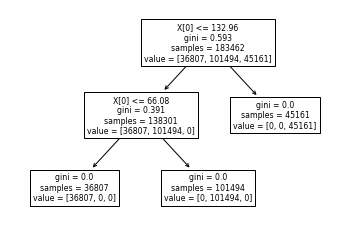

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plot_tree(modell_ansatz2)
plt.show()